In [1]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

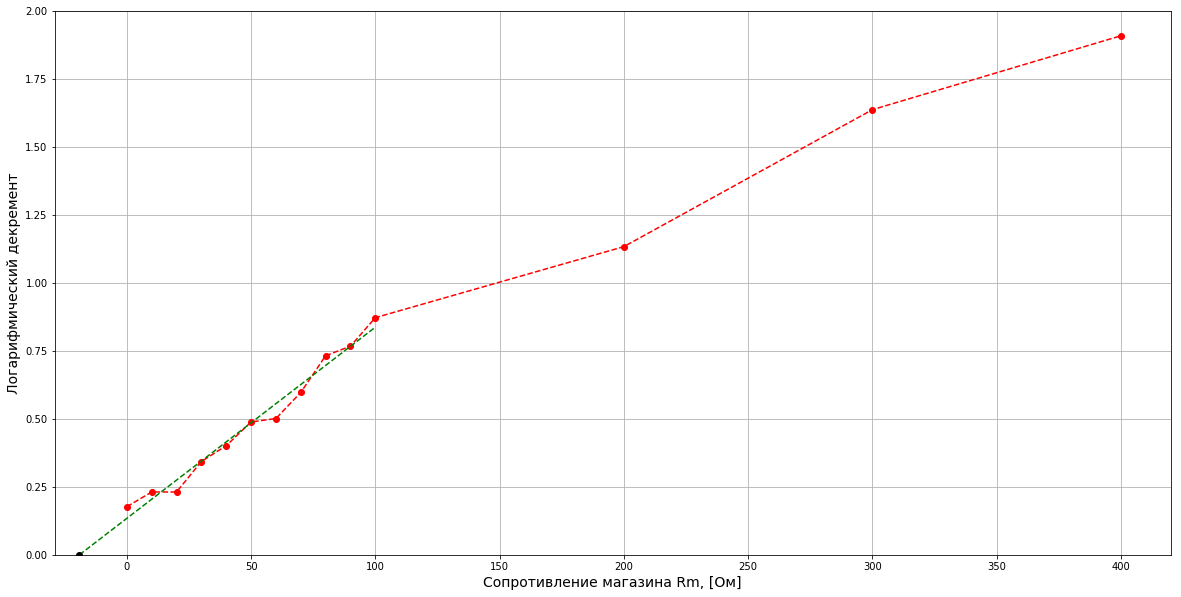

19.070083388593936


In [25]:
import matplotlib.pyplot as plt
import numpy as np

r_m = [x * 10 for x in range(11)]
[r_m.append(x * 100) for x in range(2, 5)]
log_dec = [0.17688, 0.23105, 0.23105, 0.34321, 0.40132, 0.48878, 0.50136, 0.59725, 0.73241, 0.76753, 0.87247, 1.13373, 1.63761, 1.90954]

linear_r_l = linear_approximation(r_m[:-3], log_dec[:-3])
r_0 = -linear_r_l[1] / linear_r_l[0]

plot_x = np.array(np.arange(r_0, 100, step = 0.01))

plt.figure(figsize=(20, 10))
plt.plot(r_m, log_dec, 'ro--',
         plot_x, linear(plot_x, linear_r_l[0], linear_r_l[1]), 'g--',
         r_0, 0, 'ko'
        )
         #plot_x, linear(plot_x, linear_u_i[0], linear_u_i[1]), 'g',
         #0.0, epsilon_source, 'yo')
plt.xlabel('Сопротивление магазина Rm, [Ом]', fontsize=14)
plt.ylabel('Логарифмический декремент', fontsize=14)
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([r_0 - 10, 420, 0, 2])
plt.grid()
plt.show()

print(-r_0)